In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'x':[1,2,2,3,4,4,5,6],
    'y':[2,3,4,4,4,6,5,7]
}

df = pd.DataFrame(data)

print(df)

   x  y
0  1  2
1  2  3
2  2  4
3  3  4
4  4  4
5  4  6
6  5  5
7  6  7


In [ ]:
n = len(df)
sum_x = df['x'].sum()
sum_y = df['y'].sum()
sum_xy = (df['x'] * df['y']).sum()
sum_x2 = (df['x'] ** 2).sum()

print(sum_x)
print(sum_y)
print(sum_xy)
print(sum_x2)


27
35
135
111


In [ ]:
m = ( n * sum_xy - sum_x * sum_y) / (n* sum_x2 - sum_x**2)
b = ( (sum_y/n) - m *  (sum_x/n))

print(m)
print(b)

0.8490566037735849
1.5094339622641506


In [ ]:
df['regresion'] = df['x'] * m + b

print(df)

   x  y  regresion
0  1  2   2.358491
1  2  3   3.207547
2  2  4   3.207547
3  3  4   4.056604
4  4  4   4.905660
5  4  6   4.905660
6  5  5   5.754717
7  6  7   6.603774


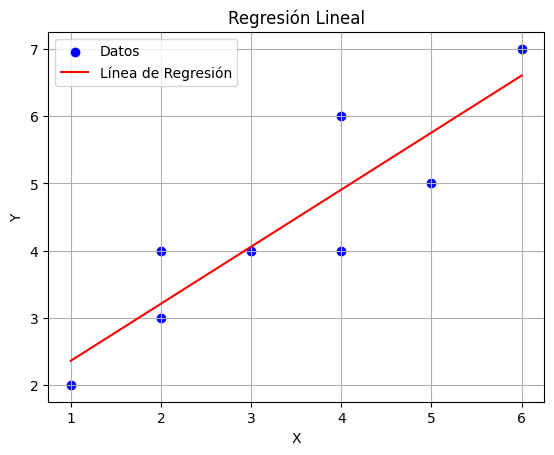

In [ ]:
plt.scatter(df['x'], df['y'], color='blue', label='Datos')
plt.plot(df['x'], df['regresion'], color='red', label='Línea de Regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

df['error'] = df['y'] - df['regresion']
df['error_2'] = df['error'] **2
df['MSE'] = df['error_2'] /n
df['RMSE'] = df['MSE'] ** 0.5


print(df)


   x  y  regresion     error   error_2       MSE      RMSE
0  1  2   2.358491 -0.358491  0.128515  0.016064  0.126746
1  2  3   3.207547 -0.207547  0.043076  0.005384  0.073379
2  2  4   3.207547  0.792453  0.627981  0.078498  0.280174
3  3  4   4.056604 -0.056604  0.003204  0.000400  0.020012
4  4  4   4.905660 -0.905660  0.820221  0.102528  0.320199
5  4  6   4.905660  1.094340  1.197579  0.149697  0.386907
6  5  5   5.754717 -0.754717  0.569598  0.071200  0.266833
7  6  7   6.603774  0.396226  0.156995  0.019624  0.140087


In [ ]:
sum_regresion = df['regresion'].sum()
sum_error = df['error'].sum()
sum_error_2 = df['error_2'].sum()
sum_MSE = df['MSE'].sum()
sum_RMSE = df['RMSE'].sum()

# Crear un DataFrame con las sumatorias
sum_df = pd.DataFrame({
    'x': [sum_x],
    'y': [sum_y],
    'regresion': [sum_regresion],
    'error': [sum_error],
    'error_2': [sum_error_2],
    'MSE': [sum_MSE],
    'RMSE': [sum_RMSE]
})


# Concatenar el DataFrame original, la fila vacía y la fila de sumatorias
df = pd.concat([df, sum_df], ignore_index=True)

# Asignar un nuevo índice con etiquetas
new_index = list(range(len(df)-2)) + ["", "Sumatorias"]
df.index = new_index

print(df)


             x   y  regresion         error   error_2       MSE      RMSE
0            1   2   2.358491 -3.584906e-01  0.128515  0.016064  0.126746
1            2   3   3.207547 -2.075472e-01  0.043076  0.005384  0.073379
2            2   4   3.207547  7.924528e-01  0.627981  0.078498  0.280174
3            3   4   4.056604 -5.660377e-02  0.003204  0.000400  0.020012
4            4   4   4.905660 -9.056604e-01  0.820221  0.102528  0.320199
5            4   6   4.905660  1.094340e+00  1.197579  0.149697  0.386907
6            5   5   5.754717 -7.547170e-01  0.569598  0.071200  0.266833
             6   7   6.603774  3.962264e-01  0.156995  0.019624  0.140087
Sumatorias  27  35  35.000000  1.776357e-15  3.547170  0.443396  1.614338
